Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


ValueError: Single argument to subplot must be a three-digit integer, not 80

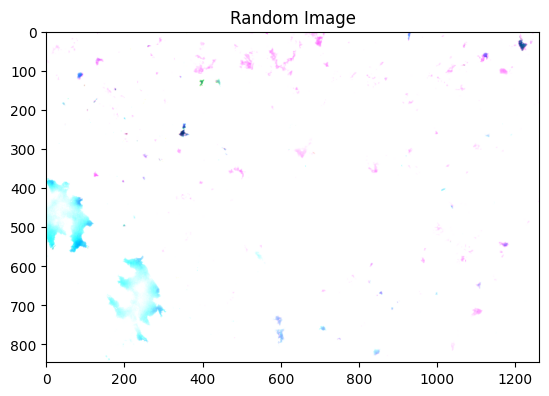

In [30]:
import random
import rasterio
from patchify import patchify
import matplotlib.pyplot as plt

# Specify the correct file path using double backslashes or raw string
dataset_root_folder = r"D:\College files\TISS\Data\Sentinal.tif"

# Open the GeoTIFF file
satellite_data = rasterio.open(dataset_root_folder)

# Read the raster bands
red_band = satellite_data.read(7)
green_band = satellite_data.read(1)
blue_band = satellite_data.read(3)

# Stack the bands into a 3D array
image_dataset = np.dstack((red_band, green_band, blue_band))

# Assuming you have a mask dataset as well, load it similarly

# Randomly select an image ID
# Adjust the range based on your dataset size
random_image_id = random.randint(100, 100)

# Display the randomly selected image and mask
plt.figure(figsize=(14, 80))
plt.subplot(121)
plt.imshow(image_dataset)
plt.title("Random Image")

# Assuming you have a mask_dataset for segmentation, adjust as needed
plt.subplot(80)
plt.imshow(mask_dataset[random_image_id])
plt.title("Random Mask")

plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Random Image with Processed Buildings')

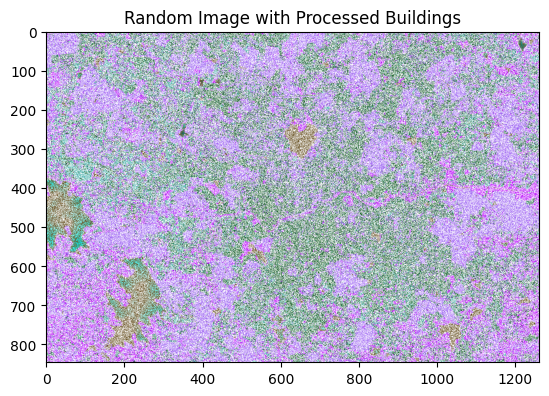

In [36]:
import random
import rasterio
import numpy as np
from patchify import patchify
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Specify the correct file path using double backslashes or raw string
dataset_root_folder = r"D:\College files\TISS\Data\Sentinal.tif"

# Open the GeoTIFF file
satellite_data = rasterio.open(dataset_root_folder)

# Read the raster bands
red_band = satellite_data.read(7)
green_band = satellite_data.read(3)
blue_band = satellite_data.read(3)

# Stack the bands into a 3D array
image_dataset = np.dstack((red_band, green_band, blue_band))

# Apply k-means clustering
n_clusters = 5  # Adjust the number of clusters based on your requirements
reshaped_bands = image_dataset.reshape((-1, image_dataset.shape[2]))
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(reshaped_bands)
clustered_image = kmeans.labels_.reshape(red_band.shape)

# Assuming you have a mask dataset as well, load it similarly
# Replace the following line with your actual mask loading logic
mask_dataset = np.random.randint(0, 2, size=(
    image_dataset.shape[0], image_dataset.shape[1]))

# Apply color transformation to buildings based on the clusters
unique_labels = np.unique(clustered_image)
for label in unique_labels:
    mask = (clustered_image == label) & (mask_dataset == 1)
    image_dataset[mask] = np.random.randint(0, 256, size=3)

# Randomly select an image ID
# Adjust the range based on your dataset size
random_image_id = random.randint(0, 100)

# Display the randomly selected image and mask
plt.figure(figsize=(14, 8))
plt.subplot(121)
plt.imshow(image_dataset)
plt.title("Buildings classified by color")

# # Assuming you have a mask_dataset for segmentation, adjust as needed
# plt.subplot(122)
# plt.imshow(mask_dataset, cmap='gray')  # Assuming the mask is a binary image
# plt.title("Random Mask")

# plt.show()

In [ ]:
pip install segmentation-models

In [ ]:
import random
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from segmentation_models import Unet
from segmentation_models import get_preprocessing



In [42]:
dataset_root_folder = r"D:\College files\TISS\Data\Sentinal.tif"
# Open the GeoTIFF file
satellite_data = rasterio.open(dataset_root_folder)

In [ ]:
# Read the raster bands
red_band = satellite_data.read(7)
green_band = satellite_data.read(3)
blue_band = satellite_data.read(3)

In [ ]:

# Stack the bands into a 3D array
image_dataset = np.dstack((red_band, green_band, blue_band))

# Assuming you have a mask dataset as well, load it similarly
# Replace the following line with your actual mask loading logic
mask_dataset = np.random.randint(0, 2, size=(
    image_dataset.shape[0], image_dataset.shape[1]))

# Preprocess the input data
preprocess_input = get_preprocessing('resnet34')
image_dataset_preprocessed = preprocess_input(image_dataset)

# Create a U-Net model
model = Unet('resnet34', classes=1, activation='sigmoid')
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])

# Assuming you have image and mask datasets for training, adjust as needed
# Replace these lines with your actual training data
X_train = np.array([image_dataset_preprocessed])
y_train = np.array([mask_dataset])

# Train the model (you may need to adjust the number of epochs and batch size)
model.fit(X_train, y_train, epochs=10, batch_size=1)

# Predict on a random image
random_image_id = random.randint(0, 100)
X_test = np.array([image_dataset_preprocessed])
predictions = model.predict(X_test)

# Threshold the predictions (adjust the threshold based on your results)
threshold = 0.5
predicted_mask = (predictions > threshold).astype(np.uint8)

# Display the randomly selected image, original mask, and predicted mask
plt.figure(figsize=(14, 8))
plt.subplot(131)
plt.imshow(image_dataset)
plt.title("Random Image")

plt.subplot(132)
plt.imshow(mask_dataset, cmap='gray')
plt.title("Original Mask")

plt.subplot(133)
plt.imshow(predicted_mask[0, ..., 0], cmap='gray')
plt.title("Predicted Mask")

plt.show()